In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [262]:
df = pd.read_excel("Input/Real_Estate_Data.xlsx")

In [263]:
df.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492.0,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774.0,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889.0,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018.0,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743.0,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [264]:
df.describe()

,Sr. No.,Property Area in Sq. Ft.,Price in Millions,Total TownShip Area in Acres
count,200.000000,200.000000,199.000000,51.000000
mean,100.500000,894.060000,9.525829,97.392157
std,57.879185,380.256831,10.186984,266.710786
min,1.000000,113.000000,1.319000,2.500000
25%,50.750000,670.000000,5.150000,5.000000
50%,100.500000,800.500000,7.000000,25.000000
75%,150.250000,1041.250000,9.943500,25.000000
max,200.000000,2447.000000,93.000000,1000.000000


In [265]:
df.dtypes

Sr. No.                               int64
Location                             object
Sub-Area                             object
Propert Type                         object
Property Area in Sq. Ft.            float64
Price in lakhs                       object
Price in Millions                   float64
Company Name                         object
TownShip Name/ Society Name          object
Total TownShip Area in Acres        float64
ClubHouse                            object
School / University in Township      object
Hospital in TownShip                 object
Mall in TownShip                     object
Park / Jogging track                 object
Swimming Pool                        object
Gym                                  object
dtype: object

In [266]:
df_selection = df[['Propert Type',
                   'Property Area in Sq. Ft.',
                   'Sub-Area',
                   'Swimming Pool',
                   'Price in Millions']]
df_selection.head()

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions
0,1 BHK,492.0,Bavdhan,Yes,3.9
1,2 BHK,774.0,Bavdhan,Yes,6.5
2,3 BHK,889.0,Bavdhan,Yes,7.4
3,3 BHK Grand,1018.0,Bavdhan,Yes,8.9
4,2BHK,743.0,Mahalunge,Yes,7.4


In [267]:
nan_rows = df_selection[df_selection.isnull().any(axis=1)]
nan_rows

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions
41,3BHK,1705.0,Keshav Nagar,Yes,NaN


In [268]:
nan_rows.index.values

array([41])

In [269]:
len(df_selection)

200

In [270]:
df_selection = df_selection.drop(nan_rows.index.values)
len(df_selection)

199

In [271]:
df_selection['Propert Type'] = df_selection['Propert Type'].str.extract('(\d+)')
df_selection.head()

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions
0,1,492.0,Bavdhan,Yes,3.9
1,2,774.0,Bavdhan,Yes,6.5
2,3,889.0,Bavdhan,Yes,7.4
3,3,1018.0,Bavdhan,Yes,8.9
4,2,743.0,Mahalunge,Yes,7.4


In [272]:
nan_rows = df_selection[df_selection.isnull().any(axis=1)]
nan_rows
len(df_selection)

199

In [273]:
df_selection = df_selection.drop(nan_rows.index.values)
len(df_selection)

198

In [274]:
df_selection['Sub-Area'].unique()

array(['Bavdhan', 'Mahalunge', 'Balewadi', 'Ravet', 'Baner', 'Kharadi',
       'Koregaon Park', 'Keshav Nagar', 'KirkatWadi Sinhagad Road',
       'Akurdi', 'tathawade', 'hadapsar', 'kiwale', 'kayani nagar',
       'pisoli', 'manjri ', 'mahalunge', 'handewadi', 'koregoan',
       'Mundhwa', 'NIBM', 'BT Kawade RD', 'Undri ', 'Karvanagar ',
       'magarpatta ', 'Hinjewadi ', 'ravet ', 'vimannagar',
       'wadgaon sheri ', 'Susgaon ', 'mohammadwadi ', 'dhanori ',
       'bavdhan budruk ', 'lonavala', 'baner', 'bavdhan', 'talegoan ',
       'BANER'], dtype=object)

In [275]:
df_selection['Sub-Area'] = df_selection['Sub-Area'].str.lower().str.strip()
df_selection['Sub-Area'].unique()

array(['bavdhan', 'mahalunge', 'balewadi', 'ravet', 'baner', 'kharadi',
       'koregaon park', 'keshav nagar', 'kirkatwadi sinhagad road',
       'akurdi', 'tathawade', 'hadapsar', 'kiwale', 'kayani nagar',
       'pisoli', 'manjri', 'handewadi', 'koregoan', 'mundhwa', 'nibm',
       'bt kawade rd', 'undri', 'karvanagar', 'magarpatta', 'hinjewadi',
       'vimannagar', 'wadgaon sheri', 'susgaon', 'mohammadwadi',
       'dhanori', 'bavdhan budruk', 'lonavala', 'talegoan'], dtype=object)

In [276]:
area_encoded = pd.get_dummies(df_selection['Sub-Area'], prefix='area', dtype='float64')
area_encoded.head()

,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,area_dhanori,area_hadapsar,area_handewadi,area_hinjewadi,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:
df_selection = pd.concat([df_selection, area_encoded], axis=1)
df_selection.head()

,Propert Type,Property Area in Sq. Ft.,Sub-Area,Swimming Pool,Price in Millions,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1,492.0,bavdhan,Yes,3.9,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,774.0,bavdhan,Yes,6.5,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,889.0,bavdhan,Yes,7.4,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1018.0,bavdhan,Yes,8.9,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,743.0,mahalunge,Yes,7.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
df_selection = df_selection.drop(['Sub-Area'], axis=1)
df_selection.head()

,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1,492.0,Yes,3.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,774.0,Yes,6.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,889.0,Yes,7.4,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1018.0,Yes,8.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,743.0,Yes,7.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
df_selection['Swimming Pool'] = df_selection['Swimming Pool'].str.lower().str.strip()
df_selection['Swimming Pool'].unique()

array(['yes', 'no'], dtype=object)

In [280]:
df_selection['Swimming Pool'] = df_selection['Swimming Pool'].map({'yes': True, 'no': False})

In [281]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [282]:
df_selection['Property Area in Sq. Ft.'] = scaler.fit_transform(df_selection[['Property Area in Sq. Ft.']]) 

In [283]:
df_selection.head()

,Propert Type,Property Area in Sq. Ft.,Swimming Pool,Price in Millions,area_akurdi,area_balewadi,area_baner,area_bavdhan,area_bavdhan budruk,area_bt kawade rd,...,area_mundhwa,area_nibm,area_pisoli,area_ravet,area_susgaon,area_talegoan,area_tathawade,area_undri,area_vimannagar,area_wadgaon sheri
0,1,0.162382,True,3.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.283205,True,6.5,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.332476,True,7.4,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.387746,True,8.9,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.269923,True,7.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [284]:
df_selection['Propert Type'] = df_selection['Propert Type'].astype(float, errors='raise')
#df_selection['Property Area in Sq. Ft.'] = df_selection['Property Area in Sq. Ft.'].astype(float, errors='raise')
df_selection['Swimming Pool'] = df_selection['Swimming Pool'].astype(float, errors='raise')
#df_selection['Price in Millions'] = df_selection['Price in Millions'].astype(float, errors='raise')

In [285]:
df_selection.dtypes

Propert Type                     float64
Property Area in Sq. Ft.         float64
Swimming Pool                    float64
Price in Millions                float64
area_akurdi                      float64
area_balewadi                    float64
area_baner                       float64
area_bavdhan                     float64
area_bavdhan budruk              float64
area_bt kawade rd                float64
area_dhanori                     float64
area_hadapsar                    float64
area_handewadi                   float64
area_hinjewadi                   float64
area_karvanagar                  float64
area_kayani nagar                float64
area_keshav nagar                float64
area_kharadi                     float64
area_kirkatwadi sinhagad road    float64
area_kiwale                      float64
area_koregaon park               float64
area_koregoan                    float64
area_lonavala                    float64
area_magarpatta                  float64
area_mahalunge  

In [286]:
X = df_selection.drop(['Price in Millions'], axis=1)
print(X.shape)

Y = df_selection['Price in Millions']
print(Y.shape)

(198, 36)
(198,)


In [287]:
# reshape the array
Y = Y.values.reshape((Y.shape[0], 1))
print(Y.shape)

(198, 1)


In [288]:
# test data and shape
X_test=X[150:].T  
Y_test=Y[150:].T  
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

#training data and shape
X_train = X[:150].T
Y_train = Y[:150].T
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape) 

X_test: (36, 48)
Y_test: (1, 48)
X_train: (36, 150)
Y_train: (1, 150)


In [289]:
n_in = X_train
n_out = Y_train
n = n_in.shape[0] # this equals to 36
print(n)

# calculate the standard deviation
std = np.sqrt(2.0/n_out.shape[0])

# calculate the radom weights
W = np.random.randn(n_out.shape[0], n_in.shape[0]) * std
print(W)

36
[[-0.99434457  2.0072284   1.35653272 -0.92814989  0.42003609 -0.35250318
  -1.42270621  1.54993963  2.63475296 -1.83804689  1.26920358  1.57560173
   1.65548975  0.04500853  0.72983485 -1.26106663 -0.32667674  2.30731388
   0.68513801 -0.26888386 -1.65314065  2.80570427 -0.59031933 -0.16951254
  -0.59686708 -0.24429301  0.32467734  2.32906677 -2.39622644 -1.51867546
   1.20263903 -0.71724434  0.48613281 -0.18110907 -0.47964626  2.88324591]]


In [290]:
# initialize the bias as zero
b = np.zeros((n_out.shape[0], 1))

In [291]:
# initialize the intermediate variable
Z = np.dot(W, n_in) + b
Z.shape

(1, 150)

In [292]:
# ReLu function
Y_hat = np.maximum(0,Z)

In [293]:
Y_hat.shape[1]

150

In [294]:
Y = Y_train
n = Y_hat.shape[1]

# calculate the loss
E = (1/n) * np.sum(np.square(Y_hat - Y))
E,E.shape

(206.84668977978995, ())

In [295]:
# derivative of the loss function
dE = (2/n) * (Y_hat - Y)
dE.shape

(1, 150)

In [296]:
# derivative of the ReLu function
dY_hat = (Z > 0)
dY_hat.shape

(1, 150)

In [297]:
# input data
dZ = n_in
dZ.shape

(36, 150)

In [298]:
# calculate gradients of the loss function with respect to W
dW = np.dot((dE * dY_hat), dZ.T)
dW, dW.shape

(array([[-1.32500940e+01, -2.30005532e+00, -4.85968665e+00,
          0.00000000e+00, -1.83481299e-01,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -1.10087675e+00,
          0.00000000e+00, -1.98155226e-01, -4.29969202e-01,
         -8.57851475e-01,  0.00000000e+00, -3.25780987e-01,
          0.00000000e+00,  0.00000000e+00, -3.79243704e-03,
         -3.08237697e-01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -1.36330403e-01,
         -4.73106746e-02,  0.00000000e+00,  0.00000000e+00,
         -1.42756281e+00,  0.00000000e+00,  0.00000000e+00,
         -1.50841596e-01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00, -2.02607497e-01]]),
 (1, 36))

In [299]:
# define the learning rate
alpha = 0.1

# update the weights
W = W - (alpha * dW)

# see updated weights
W, W.shape

(array([[ 0.33066483,  2.23723393,  1.84250138, -0.92814989,  0.43838422,
         -0.35250318, -1.42270621,  1.54993963,  2.74484063, -1.83804689,
          1.28901911,  1.61859865,  1.7412749 ,  0.04500853,  0.76241295,
         -1.26106663, -0.32667674,  2.30769313,  0.71596178, -0.26888386,
         -1.65314065,  2.80570427, -0.59031933, -0.1558795 , -0.59213602,
         -0.24429301,  0.32467734,  2.47182305, -2.39622644, -1.51867546,
          1.21772319, -0.71724434,  0.48613281, -0.18110907, -0.47964626,
          2.90350666]]),
 (1, 36))

In [300]:
# derivative of the loss function with respect to b
db = np.sum(dE * dY_hat, axis=1, keepdims=True)

# update the bias
b = b - (alpha * db)
b, b.shape

(array([[0.53727981]]), (1, 1))

In [301]:
# define a variable to store the error calculated in each iteration
error = []

# set number of epochs
epochs = 100 

# iteration
for i in range(epochs):

    # initialize the intermediate variable
    Z = np.dot(W, n_in) + b
    
    # forward-propagation
    # ReLU activation
    Y_hat = np.maximum(0,Z) 
    
    # define the sample size 'n'
    # note that the true value 'Y' is already defined in the above calculation - no need to define it again.
    n = Y_hat.shape[1] 
     
    # calculate the mean squared error or loss function
    E = (1 / n) * np.sum(np.square(Y_hat - Y))

    # backward-propagation
    # derivative of the loss function
    dE = (2 / n) * (Y_hat - Y) 
    
    # derivative of Relu Activation function
    dY_hat = (Z > 0)

    # input data 
    dZ = n_in  

    # derivative of loss function with respect to weights
    dW = np.dot((dE * dY_hat),dZ.T)
    
    # derivative of loss function with respect to bias
    db = np.sum((dE * dY_hat), axis = 1, keepdims = True)
    
    # update weights
    W = W - (dW * alpha)
    
    # update bias
    b = b - (db * alpha) 

    # error
    error.append(E)

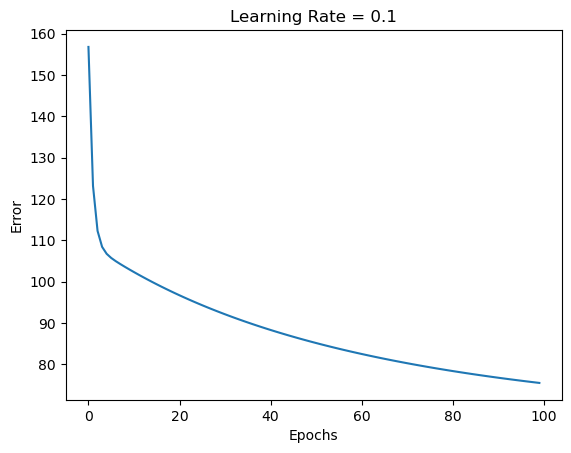

In [302]:
# plot the error
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title("Learning Rate = " + str(alpha))
plt.plot(np.squeeze(error))
plt.show()

In [303]:
# let's now push our test set through the neural network with our learned weights and bias 
Z_predict = np.dot(W, X_test) + b  

# activation function
Y_hat_predict=np.maximum(0,Z_predict)

# define the size
n = X_test.shape[1]  

# error prediction
E_predict = (1 / n) * np.sum(np.square(Y_hat_predict - Y_test))

In [304]:
# updated error
E_predict

22.725519008352226

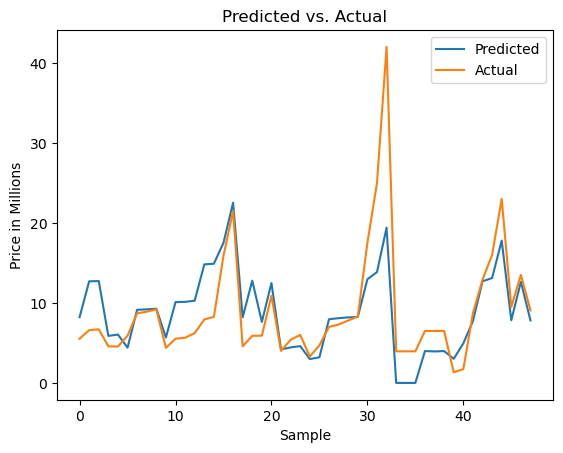

In [305]:
# plot the predicted values vs. the actual values
plt.ylabel('Price in Millions')
plt.xlabel('Sample')
plt.title("Predicted vs. Actual")
plt.plot(np.squeeze(Y_hat_predict),label = "Predicted")
plt.plot(np.squeeze(Y_test), label = "Actual")
plt.legend()
plt.show()